## About this case study

I have used regularization technique methods :-
Here in this project you will see that I have firstly showed you the model with no regularization technique and model with  regularization technique.
Here L1 and L2 are used to prevent Overfitting.You will be seeing the different weights.L2 just minimizes all weights which are bigger to prevent overfitting and L1 also does in the same way and also it does some weights zero(0)i.e means it ignores the features which has no importance by giving us the sparse matrix

About GridSearch:

Used to calculate the Value of Lambda which we  saw in our Logistic Loss Function. 
It is gives me the best value of C.And after getting the best value of C I have applied that value in Logistic Regression

We will work with the toy example of breast cancer dataset already avaiable in sklearn.

In [1]:
import sklearn

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [3]:
data = load_breast_cancer()

In [4]:
results = []

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
X,y = load_breast_cancer(return_X_y = True)

In [8]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y ,test_size = 0.2,random_state = 24)

In [10]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [11]:
train_y.sum()/455

0.6241758241758242

In [12]:
test_y.sum()/114

0.6403508771929824

### Before applying any regularization parameter

In [13]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state= 24,penalty='none')
model.fit(train_X,train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y,preds)
print("Accuracy of naive model is : ",accuracy)

Accuracy of naive model is :  0.9473684210526315


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## After applying any regularization parameter

### So here we have to increase our iterations and by default L2 is applied

In [14]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state= 24,max_iter = 15000)
model.fit(train_X,train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y,preds)
print("Accuracy of naive model is : ",accuracy)
print(model.coef_)
results.append({'accuracy':accuracy,'scaling': 'No','regularization' : 'None'})

Accuracy of naive model is :  0.9385964912280702
[[ 0.70822158  0.25696066 -0.25514854  0.02216392 -0.13984332 -0.16963864
  -0.38724833 -0.25042428 -0.1842409  -0.01619755 -0.05819108  0.84862675
   0.15745831 -0.11805144 -0.0101085   0.11449683  0.0433395  -0.02114234
  -0.0115878   0.02423929  0.19194614 -0.54130105 -0.11924088 -0.0131989
  -0.25446215 -0.45263807 -1.00932344 -0.50235656 -0.45206531 -0.04216492]]


Accuracy with L2 regularization and without scaling : 93.85

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(test_y,preds)

array([[38,  3],
       [ 4, 69]], dtype=int64)

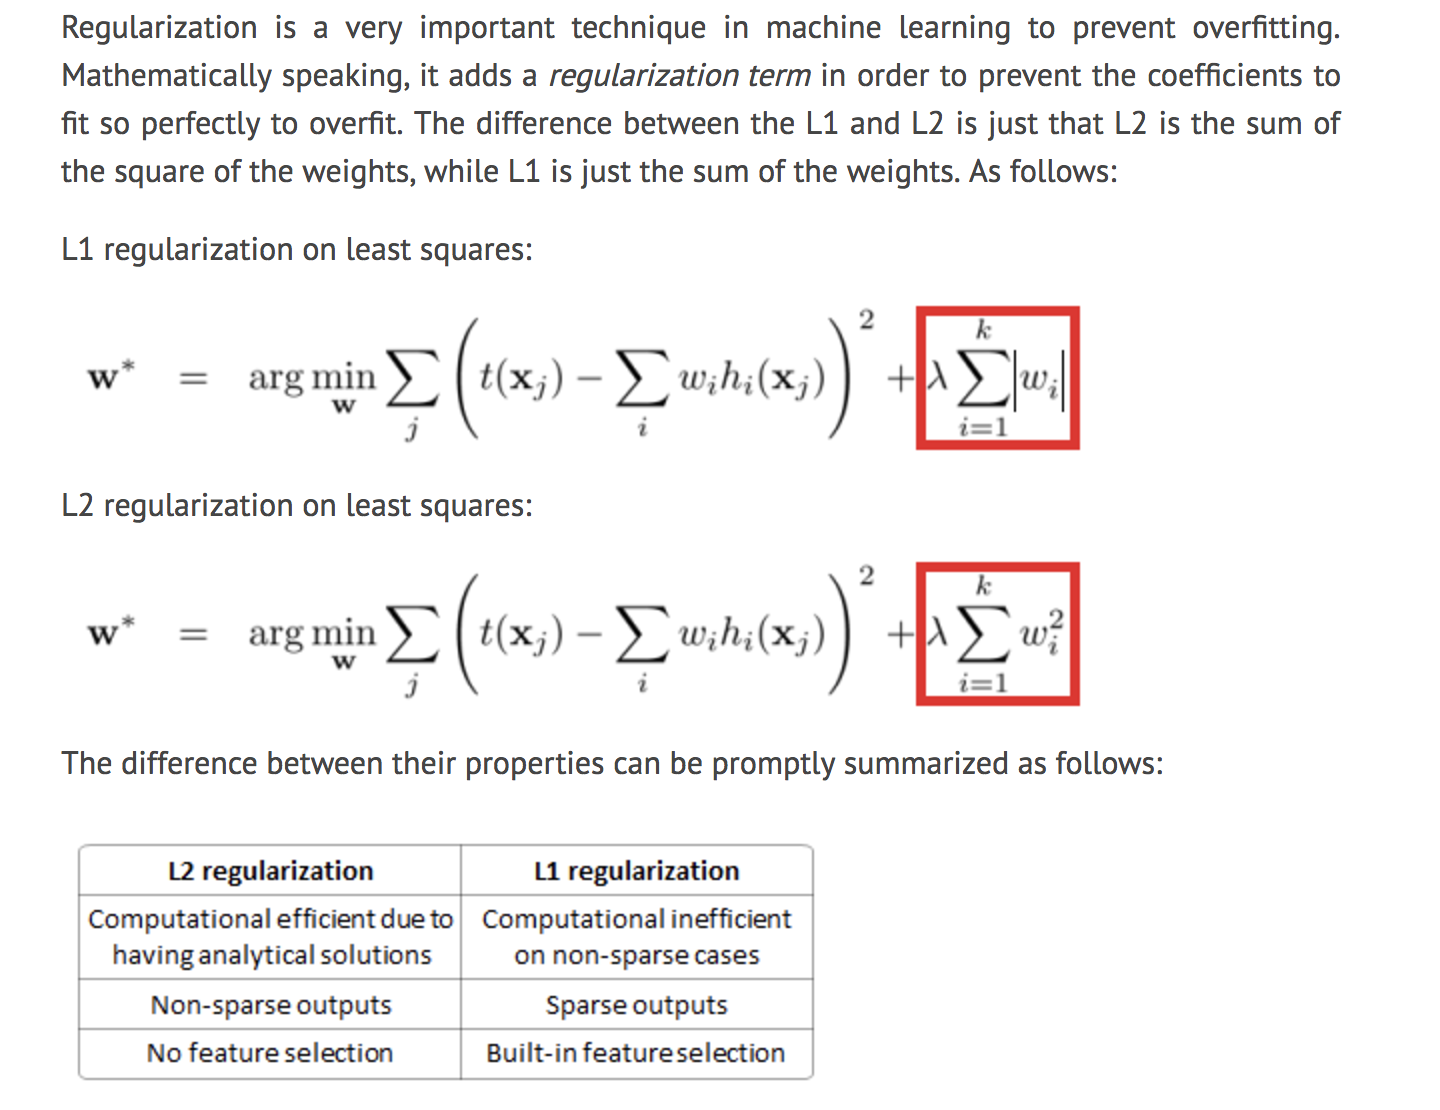

In [17]:
from PIL import Image
img = Image.open('687474703a2f2f692e696d6775722e636f6d2f546650566e4d452e706e67.png')
img

### Accuracy after Scaling
Here we have not selected any regularization parameter

In [18]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state= 24,max_iter = 15000, penalty = 'none')
model.fit(train_X,train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y,preds)
print("Accuracy of naive model is : ",accuracy)
print(model.coef_)
results.append({'accuracy':accuracy,'scaling': 'No','regularization' : 'None'})

Accuracy of naive model is :  0.9473684210526315
[[ 6.46648917e+00 -1.40401968e-01  9.39066508e-01 -1.18898947e-01
  -2.94983184e+01 -6.11822248e+00 -2.38169764e+01 -6.08157602e+01
   9.95918095e+00  3.91848711e+00 -1.18758117e+01  1.62196694e+00
   9.25825262e-01 -2.40953012e-01  4.68721237e-01  5.94506366e+01
   7.05430522e+01  7.29598913e-01  1.06165709e+01  1.36445392e+01
  -6.82590700e+00 -6.30998945e-01 -7.64996822e-02  4.43048444e-02
  -3.32381659e+01  6.80354069e+00 -1.64797241e+01 -8.23862038e+01
  -4.84353752e+00  1.35127542e+01]]


Accuracy without regularization and more iterations : 94.73 and we see that the coefficients are big 

In [19]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 15000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 24,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
model.coef_

array([[ 6.46648917e+00, -1.40401968e-01,  9.39066508e-01,
        -1.18898947e-01, -2.94983184e+01, -6.11822248e+00,
        -2.38169764e+01, -6.08157602e+01,  9.95918095e+00,
         3.91848711e+00, -1.18758117e+01,  1.62196694e+00,
         9.25825262e-01, -2.40953012e-01,  4.68721237e-01,
         5.94506366e+01,  7.05430522e+01,  7.29598913e-01,
         1.06165709e+01,  1.36445392e+01, -6.82590700e+00,
        -6.30998945e-01, -7.64996822e-02,  4.43048444e-02,
        -3.32381659e+01,  6.80354069e+00, -1.64797241e+01,
        -8.23862038e+01, -4.84353752e+00,  1.35127542e+01]])

In [21]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state= 24,max_iter = 15000, solver = 'liblinear', penalty = 'l1')
model.fit(train_X,train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y,preds)
print("Accuracy of naive model is : ",accuracy)
print(model.coef_)
results.append({'accuracy':accuracy,'scaling': 'No','regularization' : 'L1'})

Accuracy of naive model is :  0.956140350877193
[[ 4.2850581   0.14629777 -0.15672067 -0.02474493  0.          0.
   0.          0.          0.          0.          0.          0.71759631
   0.         -0.09218156  0.          0.          0.          0.
   0.          0.          0.         -0.39685558 -0.07796011 -0.01435606
   0.          0.         -3.28807696  0.          0.          0.        ]]


Accuracy with L1 regularization and without scaling : 95.61

We see that the coefficients are 0 now and we get a sparse vector

Now we see the data and do some minor exploration

In [22]:
import pandas as pd

In [23]:
data_df = pd.DataFrame(X, columns = data['feature_names'])
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
model = LogisticRegression(random_state= 24, max_iter = 15000)
model.fit(train_X, train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y, preds)
print('Accuracy of l2 regularization is : ', accuracy)
print(model.coef_)
results.append( {'accuracy': accuracy,'scaling':'Yes', 'regularization':'l2'})

Accuracy of l2 regularization is :  0.9385964912280702
[[ 0.70822158  0.25696066 -0.25514854  0.02216392 -0.13984332 -0.16963864
  -0.38724833 -0.25042428 -0.1842409  -0.01619755 -0.05819108  0.84862675
   0.15745831 -0.11805144 -0.0101085   0.11449683  0.0433395  -0.02114234
  -0.0115878   0.02423929  0.19194614 -0.54130105 -0.11924088 -0.0131989
  -0.25446215 -0.45263807 -1.00932344 -0.50235656 -0.45206531 -0.04216492]]


Accuracy with L2 regularization and scaling : 93.85

In [27]:
model = LogisticRegression(random_state= 24, max_iter = 15000, penalty='none')
model.fit(train_X, train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y, preds)
print('Accuracy of naive model is : ', accuracy)
print(model.coef_)
results.append( {'accuracy': accuracy,'scaling':'Yes', 'regularization':'None'})

Accuracy of naive model is :  0.9473684210526315
[[ 6.46648917e+00 -1.40401968e-01  9.39066508e-01 -1.18898947e-01
  -2.94983184e+01 -6.11822248e+00 -2.38169764e+01 -6.08157602e+01
   9.95918095e+00  3.91848711e+00 -1.18758117e+01  1.62196694e+00
   9.25825262e-01 -2.40953012e-01  4.68721237e-01  5.94506366e+01
   7.05430522e+01  7.29598913e-01  1.06165709e+01  1.36445392e+01
  -6.82590700e+00 -6.30998945e-01 -7.64996822e-02  4.43048444e-02
  -3.32381659e+01  6.80354069e+00 -1.64797241e+01 -8.23862038e+01
  -4.84353752e+00  1.35127542e+01]]


In [28]:
model = LogisticRegression(random_state= 24, max_iter = 15000, solver='liblinear', penalty = 'l1' )
model.fit(train_X, train_y)
preds = model.predict(test_X)
accuracy = accuracy_score(test_y, preds)
print('Accuracy of naive model with l1 regularization is : ', accuracy)
print(model.coef_)
results.append( {'accuracy': accuracy,'scaling':'Yes', 'regularization':'l1'})

Accuracy of naive model with l1 regularization is :  0.956140350877193
[[ 4.2850581   0.14629777 -0.15672067 -0.02474493  0.          0.
   0.          0.          0.          0.          0.          0.71759631
   0.         -0.09218156  0.          0.          0.          0.
   0.          0.          0.         -0.39685558 -0.07796011 -0.01435606
   0.          0.         -3.28807696  0.          0.          0.        ]]


Accuracy on basic model with l1 regularization and scaling is : 95.61

In [29]:
pd.DataFrame(results)

,accuracy,scaling,regularization
0,0.938596,No,None
1,0.947368,No,None
2,0.956140,No,L1
3,0.938596,Yes,l2
4,0.947368,Yes,None
5,0.956140,Yes,l1


# Hyper parameter tuning 

Using GridSearchCV to find best parameters for Regularization

In [30]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(random_state = 24, max_iter = 20000)
params_to_tune = [ {'C': [1e-4, 1e-2, 1e-1,1,10, 100, 1000] },
                   {'tol': [ 1e-4, 1e-3,100,1000 ]},
                   
                  ]

cv_object = GridSearchCV(model , params_to_tune, scoring = 'accuracy',n_jobs=-1)

cv_object.fit(train_X, train_y)


GridSearchCV(estimator=LogisticRegression(max_iter=20000, random_state=24),
             n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000]},
                         {'tol': [0.0001, 0.001, 100, 1000]}],
             scoring='accuracy')

In [31]:
cv_object.best_estimator_

LogisticRegression(C=100, max_iter=20000, random_state=24)

In [32]:
cv_object.best_score_

0.9648351648351647

In [33]:
cv_object.best_params_

{'C': 100}

In [34]:
# running on test dataset 
final_model = cv_object.best_estimator_

preds = final_model.predict(test_X)

print('Accuracy Score : ', accuracy_score(test_y, preds))

Accuracy Score :  0.9473684210526315


### Let's see how weights change with different values of C 

In [35]:
import numpy as np 
model = LogisticRegression(C = 10,solver='liblinear', penalty = 'l1')
model.fit(train_X, train_y)


print(model.coef_)
print(np.count_nonzero(model.coef_))

[[ 2.54528764e+00  9.12710949e-02  1.22535046e-01 -3.05400473e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.06754638e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.15488731e+00
  -7.10014953e-01 -8.37844469e-02  0.00000000e+00  0.00000000e+00
   5.13196651e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.43252357e-01  8.72383204e-02 -2.16492837e-02
   0.00000000e+00  0.00000000e+00 -3.64068049e+00 -3.91262360e+01
  -2.79758231e+00  0.00000000e+00]]
15


In [36]:
import numpy as np 
model = LogisticRegression(C = 100,solver='liblinear', penalty = 'l1')
model.fit(train_X, train_y)


print(model.coef_)
print(np.count_nonzero(model.coef_))

[[ 1.61731407e+00 -1.00210951e-01  2.99753821e-01 -1.18157661e-02
   0.00000000e+00  4.57106816e+00 -5.21810947e+00 -1.60740879e+02
   1.83315027e+01  0.00000000e+00 -2.92120155e+01  6.76995093e-01
   1.32395423e+00  1.00185804e-02  0.00000000e+00  1.00670032e+02
   4.13396219e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.72811493e-02 -4.97731673e-01 -8.47983940e-02 -2.76063375e-02
   0.00000000e+00  0.00000000e+00 -1.58498713e+01 -1.85815576e+01
  -1.17021449e+01  0.00000000e+00]]
21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Let's see how my weights change

In [37]:
import numpy as np 
model = LogisticRegression(C = 0.0001,solver='liblinear', penalty = 'l1')
model.fit(train_X, train_y)


print(model.coef_)
print(np.count_nonzero(model.coef_))

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.00026318
   0.          0.          0.          0.          0.          0.        ]]
1


In [38]:
import numpy as np 
model = LogisticRegression(C = 0.01,solver='liblinear', penalty = 'l1')
model.fit(train_X, train_y)


print(model.coef_)
print(np.count_nonzero(model.coef_))

[[ 0.          0.          0.15490881  0.00479474  0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.0153367   0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.02037227
   0.          0.          0.          0.          0.          0.        ]]
4
